# Set the used parameters

In [1]:
import inference_api as api
# Same with your trained model info
class Args:
    def __init__(self):
        self.hidden_size = 200             # D-MPNN hidden dim
        self.ffn_hidden_size = 100         # Feedforward hidden dim
        self.output_size = 2               # # of properties
        self.dropout = 0.1                 # 
        self.bias = True
        self.depth = 2                     
        self.activation = "ReLU"           # activation
        self.cuda = True                   # GPU
        self.property = "solvation"
        self.aggregation = "mean"
        self.atomMessage = False           # False: only atom

# Load model & test dataset

In [4]:
# load
import joblib

model = api.load_model("best_model.pt", args= Args())                  
dataset = api.load_dataset("preprocessing/processed_binarysolv_exp.pkl") # testdataset
scaler = joblib.load('scaler.pkl')

# Check the outputs

In [ ]:
# example1: single data point
y0_sc = api.predict_single(model, dataset[1])
y0 = scaler.inverse_transform(y0_sc )
# example2: batch data
batch_size = 8
yb_sc = api.predict_batch(model, [dataset[i] for i in range(batch_size)])
yb = scaler.inverse_transform(yb_sc )

In [15]:
# single point prediction
print('True values')
print('=============================')
print("True G_solv298 = ", dataset[1]['target'][0])
print("True H_solv298 = ", dataset[1]['target'][1])
print(' ')
print('Predicted values')
print('=============================')
print("Predicted G_solv298 = ", y0[:,0])
print("Predicted H_solv298 = ", y0[:,1])


True values
True G_solv298 =  tensor(-9.1826)
True H_solv298 =  tensor(-15.3569)
 
Predicted values
Predicted G_solv298 =  [-10.819941]
Predicted H_solv298 =  [-19.966982]


In [13]:
# batch prediction
print("batch : G_solv298 = ", yb[:,0])
print("batch : H_solv298 = ", yb[:,1])

batch : G_solv298 =  [ -6.618503  -10.8199415  -1.5352366  -6.6763163  -3.9203193  -8.131009
  -8.055967  -12.219301 ]
batch : H_solv298 =  [-12.184281  -19.966982   -4.204258  -13.35022    -8.533887  -15.6744375
 -14.644889  -20.33404  ]


# predict Gibbs free E in different temperature

In [ ]:
import pandas as pd      
data_path = './data/Data and predictions of solvation free energies in binary solvents (BinarySolv-Exp).csv'     
T_of_testset = pd.read_csv(data_path)['T (K)']
test_dataset = api.load_dataset("test_binary.pkl") # testdataset

C:\Users\joojo\AppData\Local\Temp\ipykernel_35540\1707546850.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  T_of_testset = pd.read_csv(data_path)['T (K)']


### Calculate Gibbs free E in different temperature from the predicted values 
#### (use the below equation, https://doi.org/10.1016/j.cej.2025.162232)

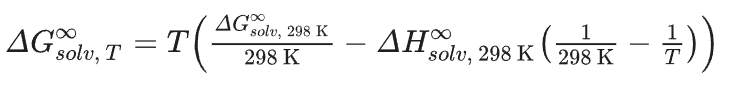

In [ ]:
print(T_of_testset)

0        288.15
1        288.15
2        288.15
3        288.15
4        288.15
          ...  
30091    347.68
30092    348.31
30093    348.31
30094    349.04
30095    349.91
Name: T (K), Length: 30096, dtype: float64
